In [1]:
# importing libraries    
import numpy as np    
import matplotlib.pyplot as plt    
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset  
dataset = pd.read_csv('Mall_Customers.csv')  

In [3]:
x = dataset.iloc[:, [3, 4]].values # Taking 4 and 5the cols , Anual income and spending score

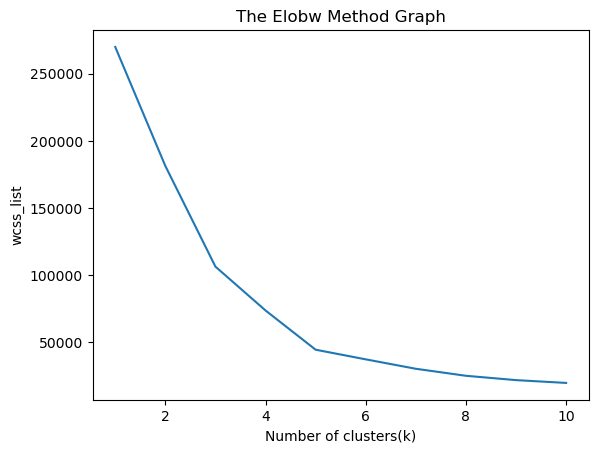

In [4]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [5]:
from sklearn.metrics import davies_bouldin_score
db={}
for k in range (2, 8):
    kmeas=KMeans(n_clusters=k).fit(x)
    labels=kmeas.predict(x)
    db[k]=davies_bouldin_score(x,labels)

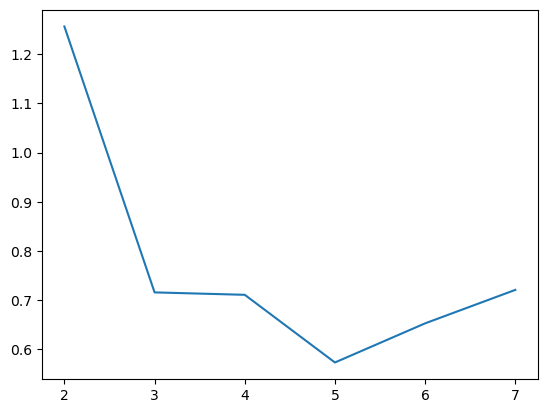

In [6]:
plt.plot(list(db.keys()), list(db.values()))

In [7]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5)  
y_predict= kmeans.fit_predict(x)  

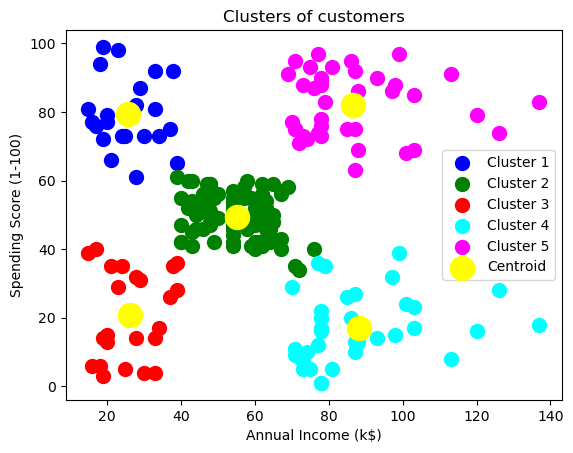

In [8]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

In [9]:
from sklearn.metrics import silhouette_score
A=silhouette_score(x, labels)
print(A)

0.5264283703685728
